In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from random import randint
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"indahauliasahira","key":"5a19fc732304e9b49d3d97927d536b8a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d auliapebiani/deeplearningtim17gami

100% 211M/211M [00:01<00:00, 219MB/s]
100% 211M/211M [00:01<00:00, 177MB/s]


In [ ]:
import zipfile,os
zip_lcl = '/content/deeplearningtim17gami.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [ ]:
dirbase = '/content/IMAGE CLASIFICATION BUNGA DAUN SAYUR'
dir_latih = os.path.join(dirbase, 'TRAIN')
dir_val = os.path.join(dirbase, 'VALIDATION')

In [ ]:
CLASSES, gems = [], []

for root, dirs, files in os.walk(dir_latih):
    f = os.path.basename(root)

    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f)

gems_count = len(CLASSES)
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 240 images in total


In [ ]:
os.listdir(dir_latih)

['DAUN', 'BUNGA', 'SAYUR']

In [ ]:
os.listdir(dir_val)

['DAUN', 'BUNGA', 'SAYUR']

In [ ]:
latih_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

val_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.3,
    shear_range=0.2,
    fill_mode='nearest')

In [ ]:
batchSize = 4

In [ ]:
generator_latih = latih_generator.flow_from_directory(
    directory=dir_latih,
    target_size=(150,150),
    batch_size=batchSize,
    subset='training',
    class_mode='categorical')
generator_valid = val_generator.flow_from_directory(
    directory=dir_val,
    target_size=(150,150),
    batch_size=batchSize,
    subset='validation',
    class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [ ]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

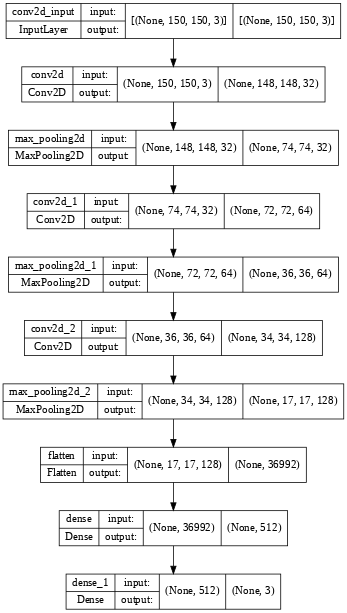

In [ ]:
model_viz = tensor.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.95):
      print("\nAkurasi di atas 90%, hentikan training!")
      self.model.stop_training = True

stop = myCallback()

In [ ]:
history = model.fit(
    generator_latih,
    steps_per_epoch=240/4, # 10243 images = batch_size * steps
    epochs=30,
    validation_data=generator_valid,
    validation_steps=9/4, # 1050 images = batch_size * steps
    verbose=2,
    callbacks=[cekmodel,stop])

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to model.hdf5
60/60 - 55s - loss: 1.3169 - accuracy: 0.4167 - val_loss: 0.7962 - val_accuracy: 0.6667 - 55s/epoch - 909ms/step
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.66667
60/60 - 42s - loss: 0.9425 - accuracy: 0.5792 - val_loss: 0.9884 - val_accuracy: 0.3333 - 42s/epoch - 695ms/step
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.66667
60/60 - 40s - loss: 0.8411 - accuracy: 0.6125 - val_loss: 0.8373 - val_accuracy: 0.5556 - 40s/epoch - 667ms/step
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.66667
60/60 - 40s - loss: 0.7670 - accuracy: 0.6667 - val_loss: 0.6862 - val_accuracy: 0.4444 - 40s/epoch - 667ms/step
Epoch 5/30

Epoch 5: val_accuracy improved from 0.66667 to 1.00000, saving model to model.hdf5

Akurasi di atas 90%, hentikan training!
60/60 - 41s - loss: 0.7512 - accuracy: 0.6792 - val_loss: 0.6496 - val_accuracy: 1.0000 - 41s/epoch - 676ms/step


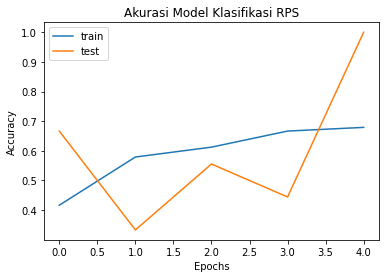

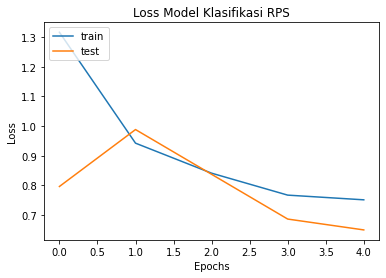

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi RPS')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmp52ugtw8g/assets


In [ ]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('/content/daun-sayur-buah.hdf5')